## Importing required modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os,json
from collections import defaultdict
from urllib.parse import urlparse
import tldextract
import seaborn as sns


pd.set_option('display.max_columns', None)


In [3]:
df_1000 = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\1000_domains_standardised_dates.csv")
df_1000_dates = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\1000_domains_blocklist_addition_dates.csv") 
df_twobatch = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\domain_twobatch_standardised_dates.csv")
# df_twobatch = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\domain_twobatch_standardised_dates.csv")
  

### Cleaning + Preparing columns

In [4]:
# Removing empty columns

empty_cols = [col for col in df_1000.columns if df_1000[col].isnull().all()]
# Drop these columns from the dataframe
df_1000.drop(empty_cols,
        axis=1,
        inplace=True)

empty_cols = [col for col in df_twobatch.columns if df_twobatch[col].isnull().all()]
# Drop these columns from the dataframe
df_twobatch.drop(empty_cols,
        axis=1,
        inplace=True)



# ## For whois_info.creation_date
def extract_last_value(value):
    format_str = '%d-%m-%YT%H:%M:%S'
#     print(value)
#     print(value,type(value))
    if isinstance(value, str):
        if ',' in value:
#             print(", found", value)
#             print("array found")
            value = value.strip("[]")
            value = value.split(",")
        
            if len(value) > 1:
                
                value = value[-1]
#                 print("value:",value, "len value:",len(value))
                value = value.replace(" ","")
                value = value.strip("'")
#                 print("value:",value, "len value:",len(value))
                value = datetime.strptime(value, format_str)
                return value
#             print(type(value))
        value = value.replace(" ","")
        value = value.strip("'")
        value = datetime.strptime(value, format_str)
#         value = datetime.strptime(value.strip("'"), format_str)
        return value
#             print("value:", value)
#             print("extracted value:", value[-1])
#         return value[-1]
    else:
        return value                                                                                         
                                                                                          

# # Create the new column using the custom function
df_1000['whois_info.creation_date_latest'] = df_1000['whois_info.creation_date'].apply(lambda x: extract_last_value(x))
df_twobatch['whois_info.creation_date_latest'] = df_twobatch['whois_info.creation_date'].apply(lambda x: extract_last_value(x))

In [5]:
df_twobatch.head()

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest
0,0,645da74e7b4cbcb7ca236637,binance-sgd-club.pages.dev,8/3/2023 8:29,7,1.0,13-03-2023T12:06:03,0,12-05-2023T10:41:18,15-05-2023T17:54:50,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,1,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,0.919615,18.113396,14.513613,0.812515,0.125095,1.606780,0.767694,NaN,NaN,NaN,NaN,NaN,resources/whois/binance-sgd-club.pages.dev_202...,[],"['172.66.44.129', '172.66.47.127']",resources/dns/binance-sgd-club.pages.dev_getho...,"['lamar.ns.cloudflare.com.', 'mia.ns.cloudflar...",resources/dns/binance-sgd-club.pages.dev_names...,binance-sgd-club.pages.dev,*.binance-sgd-club.pages.dev\nbinance-sgd-club...,"C=US, O=Google Trust Services LLC, CN=GTS CA 1P5",2023-05-03T14:31:06,2023-03-05T10:03:21,4.0,resources/cert/binance-sgd-club.pages.dev_2023...,2.0,"['binance-sgd-club.pages.dev', '*.binance-sgd-...",2.0,"['C=GB, ST=Greater Manchester, L=Salford, O=Se...",1.0,2.0,2.0,https://web.archive.org/web/20230305110552/htt...,05-03-2023T11:05:52,resources/archived_page/binance-sgd-club.pages...,NaT
1,1,645da74e7b4cbcb7ca236638,caruopay-sg-point.firebaseapp.com,8/3/2023 8:29,7,1.0,25-04-2023T22:39:14,0,12-05-2023T10:41:18,15-05-2023T17:55:06,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,53,16,0,18,0,0,0,0.867291,11.861851,0.375059,0.044326,0.043300,1.659945,1.439980,NaN,NaN,NaN,NaN,NaN,NaN,[],['199.36.158.100'],resources/dns/caruopay-sg-point.firebaseapp.co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2,645da74e7b4cbcb7ca236639,laoergood.cn,8/3/2023 8:29,7,1.0,08-03-2023T09:08:35,0,12-05-2023T10:41:18,15-05-2023T17:55:20,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,0.850947,7.506824,0.536389,0.394479,1.276218,2.749948,1.379163,腾讯云计算（北京）有限责任公司,李志宏,NaN,26-10-2022T09:11:09,NaN,resources/whois/laoergood.cn_20230515_175514.3...,NaN,NaN,NaN,"['marina.dnspod.net.', 'pansy.dnspod.net.']",resources/dns/laoergood.cn_nameservers_2023051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 09:11:09
3,3,645da74e7b4cbcb7ca23663a,police088762sg.homes,8/3/2023 8:29,7,1.0,23-11-2022T17:44:35,0,12-05-2023T10:41:18,15-05-2023T17:55:32,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screensh

In [6]:
df_1000_dates.head()

,domain,blocklist_addition_date
0,imbbk3238g.xyz,24/4/2023 20:25
1,imbbk323q.xyz,24/4/2023 20:25
2,imgg6625p.xyz,24/4/2023 20:25
3,imgg6629p.xyz,24/4/2023 20:25
4,imgg6633p.xyz,24/4/2023 20:25


In [7]:
df_twobatch.head()

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest
0,0,645da74e7b4cbcb7ca236637,binance-sgd-club.pages.dev,8/3/2023 8:29,7,1.0,13-03-2023T12:06:03,0,12-05-2023T10:41:18,15-05-2023T17:54:50,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,1,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,0.919615,18.113396,14.513613,0.812515,0.125095,1.606780,0.767694,NaN,NaN,NaN,NaN,NaN,resources/whois/binance-sgd-club.pages.dev_202...,[],"['172.66.44.129', '172.66.47.127']",resources/dns/binance-sgd-club.pages.dev_getho...,"['lamar.ns.cloudflare.com.', 'mia.ns.cloudflar...",resources/dns/binance-sgd-club.pages.dev_names...,binance-sgd-club.pages.dev,*.binance-sgd-club.pages.dev\nbinance-sgd-club...,"C=US, O=Google Trust Services LLC, CN=GTS CA 1P5",2023-05-03T14:31:06,2023-03-05T10:03:21,4.0,resources/cert/binance-sgd-club.pages.dev_2023...,2.0,"['binance-sgd-club.pages.dev', '*.binance-sgd-...",2.0,"['C=GB, ST=Greater Manchester, L=Salford, O=Se...",1.0,2.0,2.0,https://web.archive.org/web/20230305110552/htt...,05-03-2023T11:05:52,resources/archived_page/binance-sgd-club.pages...,NaT
1,1,645da74e7b4cbcb7ca236638,caruopay-sg-point.firebaseapp.com,8/3/2023 8:29,7,1.0,25-04-2023T22:39:14,0,12-05-2023T10:41:18,15-05-2023T17:55:06,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,53,16,0,18,0,0,0,0.867291,11.861851,0.375059,0.044326,0.043300,1.659945,1.439980,NaN,NaN,NaN,NaN,NaN,NaN,[],['199.36.158.100'],resources/dns/caruopay-sg-point.firebaseapp.co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2,645da74e7b4cbcb7ca236639,laoergood.cn,8/3/2023 8:29,7,1.0,08-03-2023T09:08:35,0,12-05-2023T10:41:18,15-05-2023T17:55:20,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,0.850947,7.506824,0.536389,0.394479,1.276218,2.749948,1.379163,腾讯云计算（北京）有限责任公司,李志宏,NaN,26-10-2022T09:11:09,NaN,resources/whois/laoergood.cn_20230515_175514.3...,NaN,NaN,NaN,"['marina.dnspod.net.', 'pansy.dnspod.net.']",resources/dns/laoergood.cn_nameservers_2023051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 09:11:09
3,3,645da74e7b4cbcb7ca23663a,police088762sg.homes,8/3/2023 8:29,7,1.0,23-11-2022T17:44:35,0,12-05-2023T10:41:18,15-05-2023T17:55:32,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screensh

In [8]:
df_1000_dates.drop_duplicates(subset=['domain'],keep='first', inplace=True)
len(df_1000_dates)

859

In [9]:
## joining df
df_1000 = df_1000.join(df_1000_dates.set_index('domain'), on='domain', validate='m:1')

In [10]:
## stripping time from 8/3/2023 8:29
df_twobatch.blocklist_addition_date = df_twobatch.blocklist_addition_date.str.split(' ').str[0]
df_1000.blocklist_addition_date = df_1000.blocklist_addition_date.str.split(' ').str[0]

In [11]:
df_1000['blocklist_addition_date'].value_counts(dropna=False)

blocklist_addition_date
27/4/2023    313
5/5/2023     147
NaN          141
26/4/2023     57
28/4/2023     56
4/5/2023      50
2/5/2023      49
25/4/2023     44
29/4/2023     35
30/4/2023     35
1/5/2023      34
3/5/2023      25
24/4/2023     14
Name: count, dtype: int64

In [12]:
# Replacing all Nans with 6 May 
df_1000['blocklist_addition_date'] = df_1000['blocklist_addition_date'].fillna('5/5/2023')
df_1000['blocklist_addition_date'].value_counts(dropna=False)

blocklist_addition_date
27/4/2023    313
5/5/2023     288
26/4/2023     57
28/4/2023     56
4/5/2023      50
2/5/2023      49
25/4/2023     44
29/4/2023     35
30/4/2023     35
1/5/2023      34
3/5/2023      25
24/4/2023     14
Name: count, dtype: int64

In [13]:
## replacing timestamp slash with dash
df_twobatch['blocklist_addition_date'] = df_twobatch['blocklist_addition_date'].str.replace('/', '-')
df_1000['blocklist_addition_date'] = df_1000['blocklist_addition_date'].str.replace('/', '-')


In [14]:
## converting to timestamps
df_twobatch['blocklist_addition_date'] = pd.to_datetime(df_twobatch['blocklist_addition_date'], format = '%d-%m-%Y')
df_twobatch['processed_timestamp'] = pd.to_datetime(df_twobatch['processed_timestamp'], format = '%d-%m-%YT%H:%M:%S')
df_twobatch['cert_info.latest_cert'] = pd.to_datetime(df_twobatch['cert_info.latest_cert'], format = '%Y-%m-%dT%H:%M:%S')
df_twobatch['whois_info.creation_date_latest'] = pd.to_datetime(df_twobatch['whois_info.creation_date_latest'], format = '%d-%m-%YT%H:%M:%S')

df_1000['blocklist_addition_date'] = pd.to_datetime(df_1000['blocklist_addition_date'], format = '%d-%m-%Y')
df_1000['processed_timestamp'] = pd.to_datetime(df_1000['processed_timestamp'], format = '%d-%m-%YT%H:%M:%S')
df_1000['cert_info.latest_cert'] = pd.to_datetime(df_1000['cert_info.latest_cert'], format = '%Y-%m-%dT%H:%M:%S')
df_1000['whois_info.creation_date_latest'] = pd.to_datetime(df_1000['whois_info.creation_date_latest'], format = '%d-%m-%YT%H:%M:%S')




In [15]:
mask = (df_twobatch['blocklist_addition_date'] >= '2023-03-08') & (df_twobatch['blocklist_addition_date'] <= '2023-03-12')
df1 = df_twobatch[mask]

mask = (df_twobatch['blocklist_addition_date'] >= '2023-04-08') & (df_twobatch['blocklist_addition_date'] <= '2023-04-12')
df2 = df_twobatch[mask]

mask = (df_1000['blocklist_addition_date'] >= '2023-04-24') & (df_1000['blocklist_addition_date'] <= '2023-04-30')
df3 = df_1000[mask]

mask = (df_1000['blocklist_addition_date'] >= '2023-05-01') & (df_1000['blocklist_addition_date'] <= '2023-05-07')
df4 = df_1000[mask]

df1=df1.reset_index(drop=True)
df2=df2.reset_index(drop=True)
df3=df3.reset_index(drop=True)
df4=df4.reset_index(drop=True)

In [16]:
df2

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest
0,229,645da76f7b4cbcb7ca236734,singpass.gonapp.net,2023-04-08,7,NaN,08-04-2023T07:43:56,0,12-05-2023T10:41:51,2023-05-15 20:54:39,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_181749.956.txt,0,0,0,86,0,0,0,1.232987,12.580231,2.471848,0.545259,0.682265,0.763067,1.003524,"GoDaddy.com, LLC",Registration Private,"Domains By Proxy, LLC","['04-02-2017T02:15:01', '03-02-2017T21:15:01']","['04-02-2023T04:34:36', '03-02-2023T23:34:34']",resources/whois/singpass.gonapp.net_20230515_2...,[],['103.74.122.236'],resources/dns/singpass.gonapp.net_gethostbynam...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-03 21:15:01
1,230,645da76f7b4cbcb7ca236735,fy86vip99.xyz,2023-04-08,7,NaN,03-04-2023T14:40:33,0,12-05-2023T10:41:51,2023-05-15 20:55:30,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_181749.956.txt,65,0,1,21,0,0,0,1.651077,7.983360,1.692813,1.261294,0.461075,38.784660,0.860322,DYNADOT LLC,REDACTED FOR PRIVACY,Super Privacy Service LTD c/o Dynadot,05-03-2023T10:54:49,"['26-04-2023T20:07:16', '24-03-2023T10:08:25']",resources/whois/fy86vip99.xyz_20230515_205449....,[],['192.151.197.75'],resources/dns/fy86vip99.xyz_gethostbyname_ex_2...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/fy86vip99.xyz_nameservers_202305...,fy86vip18.xyz,fy86vip99.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-03-24T09:13:06,2023-03-24 09:13:06,2.0,resources/cert/fy86vip99.xyz_20230515_205451.1...,1.0,['fy86vip18.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,https://web.archive.org/web/20230330002222/htt...,30-03-2023T00:22:22,resources/archived_page/fy86vip99.xyz_20230515...,2023-03-05 10:54:49
2,231,645da76f7b4cbcb7ca236736,lazada-ph.com,2023-04-08,7,NaN,23-04-2023T11:13:30,0,12-05-2023T10:41:51,2023-05-15 20:55:38,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_181749.956.txt,60,6,0,21,0,0,0,1.075234,3.906073,0.644524,0.808393,0.572856,0.766076,0.696836,Gname.com Pte. Ltd.,Redacted for privacy,Redacted for privacy,05-04-2023T09:02:39,"['05-05-2023T13:53:08', '05-05-2023T13:53:09']",resources/whois/lazada-ph.com_20230515_205535....,NaN,NaN,NaN,"['ns1.gname.net.', 'ns2.gname.net.']",resources/dns/lazada-ph.com_nameservers_202305...,*.lazada-ph.com,*.lazada-ph.com\nlazada-ph.com,"C=GB, ST=Greater

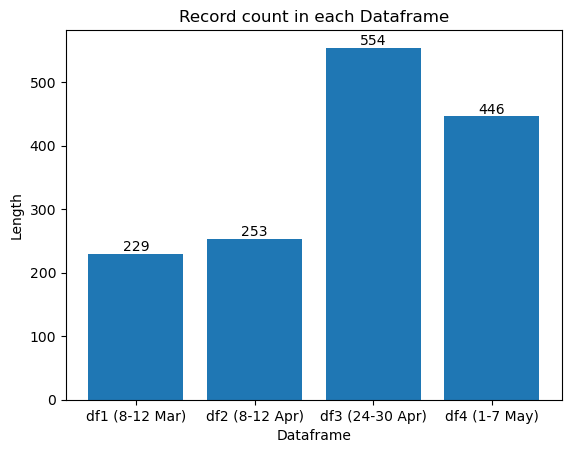

In [17]:
# Calculate the lengths of each dataframe
lengths = [len(df1), len(df2), len(df3), len(df4)]

# Create a bar plot
plt.bar(['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)'], lengths)
plt.xlabel('Dataframe')
plt.ylabel('Length')
plt.title('Record count in each Dataframe')

for i, length in enumerate(lengths):
    plt.text(i, length, str(length), ha='center', va='bottom')
    
plt.show()

# Jonathan's suggestion

## Check 1: Different Subject CNs

#### Initial (Why are we looking at this?)
* Impersonating? 
* Malicious websites evading detection?
    * Blocked due to filtered traffic by SubjectCN (Extraction of SubjectCN from certificate during handshake)
 
 
Show screenshot for: crt-sh for internet-baking-sg-diigii.com
* impersonating sg digibank, cimb and commonwealth bank

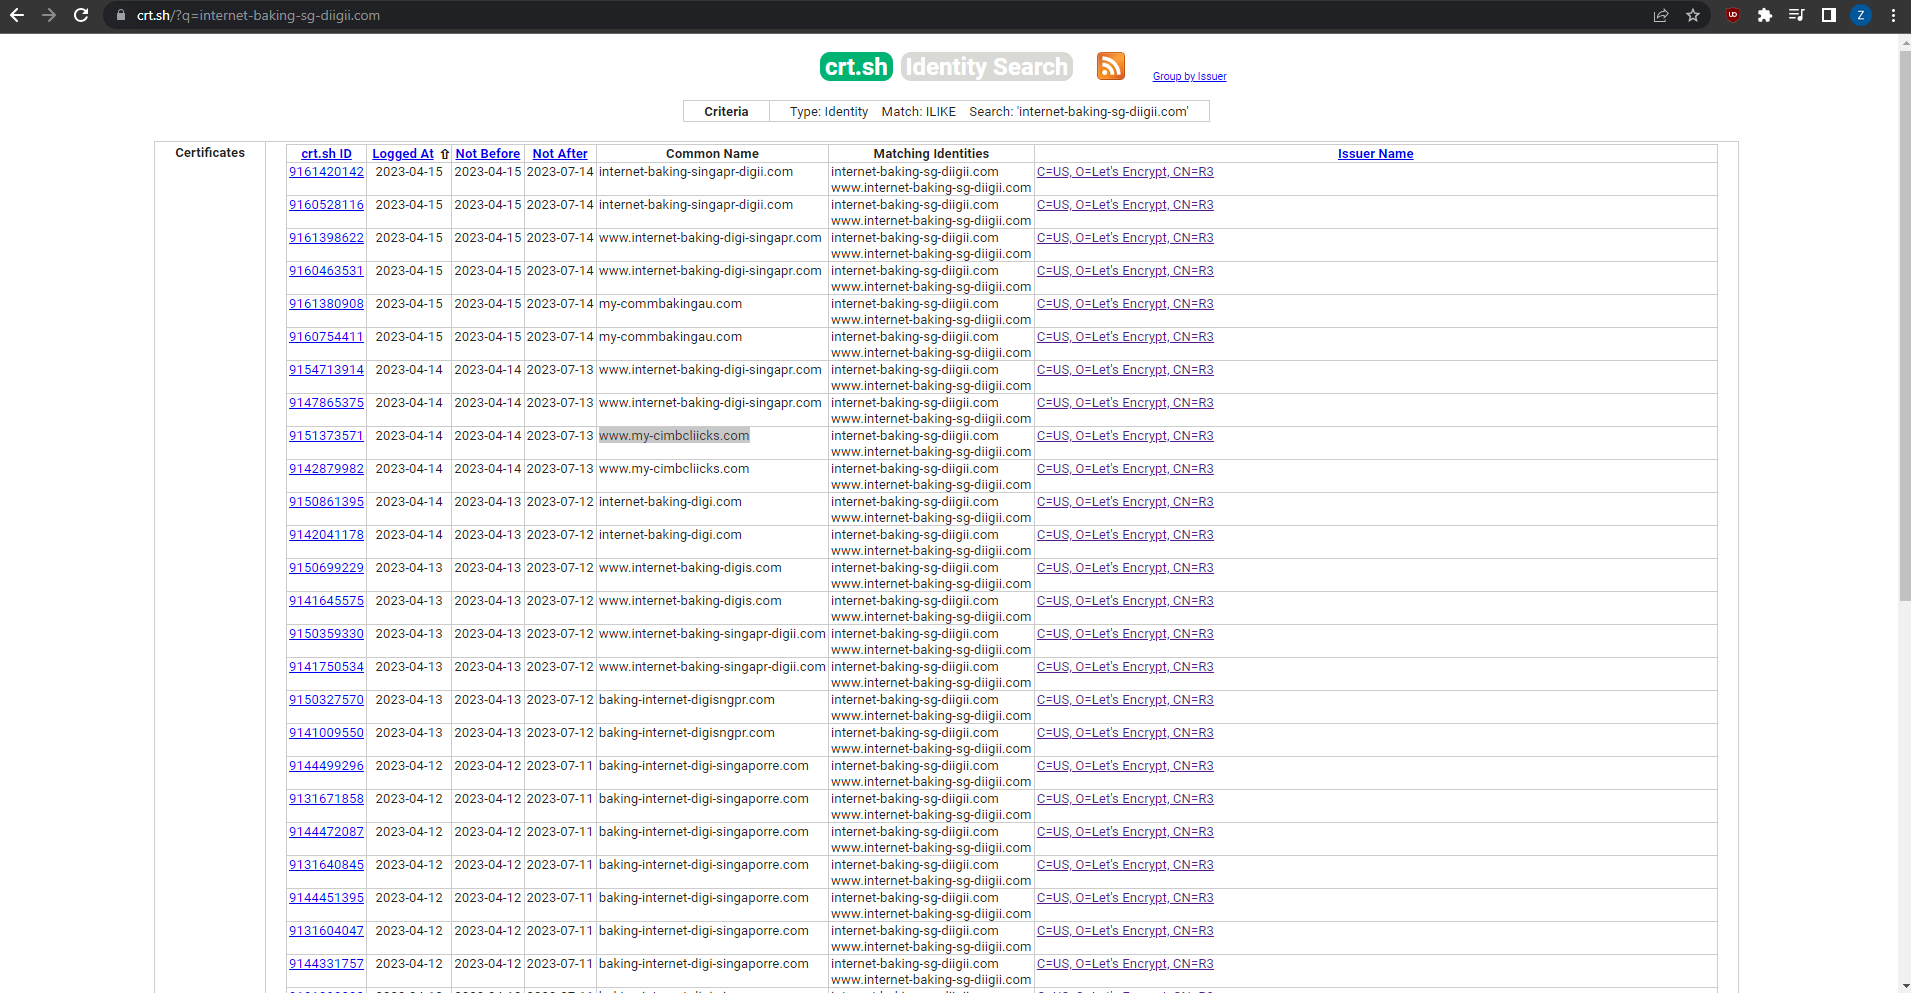

In [18]:
## SHOW JONATHAN
## URL PARSER DOESNT WORK IF in scenarios with subdomain vs domain


# url = "//www.facebook.com/hello"
# url = "//reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true"
# url = "http://docs.python.org:80/3/library/urllib.parse.html?highlight=params#url-parsing"
# url = "//ad.simonshop.com"
url = "//app.simonshop.com"
# url = "//*.simonshop.com"
# url ="//facebook.com"
parsed_url = urlparse(url)
parsed_url
# parsed_url.hostname.split('.')[0]


ParseResult(scheme='', netloc='app.simonshop.com', path='', params='', query='', fragment='')

In [19]:
## Alternative: tldextract
# extract = tldextract.extract("reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true")
url = '*.binance-sgd-club.pages.dev'
url = 'app.simonshop.com'
extract = tldextract.extract(url)
print(extract)
extract.domain
print("domain:", extract.domain)

ExtractResult(subdomain='app', domain='simonshop', suffix='com')
domain: simonshop


In [36]:
urls = ["www.facebook.com","wunderfauks-signin.com/#/pages/index/index", "xxmtkm.info/final-draft-coordinated-public-transportation-plan-released-for-review-comment/?", "wunderfauks-develop.com/#/pages/start/start", "e-lazada.com/#/login/index", "eufmyio.shop/products/05-stories-of-chata-patti-crimson-wedding-22", "krakenbq.cc/index/user/indexhtml", "www.forfurniture-downapp.com/", "imgg1265t.xyz/mobile/#/assets", "skyonetrades.com/mobile/en-us/m.html#/myAccount", "fy31bb2392.shop/mobile", "chartercom-singapore-project.pages.dev/#/", "dktunvslkjslgj.com/index/user/login.html", "p-dro.bio/auth", "www.mabangerp.plus/#/login", "dgtsdnvsdhgws.com/index/rot_order/index.html", "espire-home.com/#/pages/index/index", "in2ideas-enhance.com/#/", "shop-e2mallapp.com/to", "snreviews.com/getorder/evaluation", "app.qqcjqff1012.xyz/s/qURj", "app.qqcjqxz1023.xyz/s/mlenderios", "app-a1.ztajhi.cn/s/mlenderios?key=646S56376F6G465D31376383333M031R333X732C39&c=", "reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true", "www.notchstudio-online.com/#/", "beepmall.app/#/pages/login/login", "zappz-program.com/#/", "www.42matters-app.com/#/pages/userPages/login/login", "forecepts-project.com/#/pages/start/start", "www.impact-eu.com/#/index1", "ksldhglslsdjg.com/index/user/login.html", "unrivaledinsight.com/web", "dbshk.cc/speed.html#/", "www.impact-bv.com/#/index1","www.youtube.com","youtube.com", "rs51rma7kwfuchvsl.7ut37gb.buzz/www.dbs.com.hk"]

In [37]:
for url in urls:
    print("current url:", url)
#     extract = tldextract.extract(url)
#     print(extract)
    if url[0] != '/':
        modified_url = "//" + url
    parsed_url = urlparse(modified_url)
    print(parsed_url)
    print("url:",url)
    print("netloc:",parsed_url.netloc)
    if url == parsed_url.netloc:
        print("is domain")
    print("=====")

current url: www.facebook.com
ParseResult(scheme='', netloc='www.facebook.com', path='', params='', query='', fragment='')
url: www.facebook.com
netloc: www.facebook.com
is domain
=====
current url: wunderfauks-signin.com/#/pages/index/index
ParseResult(scheme='', netloc='wunderfauks-signin.com', path='/', params='', query='', fragment='/pages/index/index')
url: wunderfauks-signin.com/#/pages/index/index
netloc: wunderfauks-signin.com
=====
current url: xxmtkm.info/final-draft-coordinated-public-transportation-plan-released-for-review-comment/?
ParseResult(scheme='', netloc='xxmtkm.info', path='/final-draft-coordinated-public-transportation-plan-released-for-review-comment/', params='', query='', fragment='')
url: xxmtkm.info/final-draft-coordinated-public-transportation-plan-released-for-review-comment/?
netloc: xxmtkm.info
=====
current url: wunderfauks-develop.com/#/pages/start/start
ParseResult(scheme='', netloc='wunderfauks-develop.com', path='/', params='', query='', fragment='/p

In [18]:
## what are Subject CNs? --> Subject Common Name: Information about the entity to which the certificate is issued.
## One CN per Cert. 
## Why are we looking at it? --> While a website can have multiple certificates issued over time,
# each certificate corresponds to a specific period and is tied to a particular domain. e.g. example.com will be issued subjectCN example.com.
#Tryna be dodgy / escape blacklist?


def get_unique_domains(subjectCN_set):
    if isinstance(subjectCN_set, float):
        return False
    
    domain_set = set()
#     print(subjectCN_set)
    subjectCN_set = subjectCN_set.strip('][').split(', ')

    for subjectCN in subjectCN_set:
        subjectCN = subjectCN.replace("'",'')
        extract = tldextract.extract(subjectCN)
#         subdomain = extract.subdomain
        domain = extract.domain
#         print("domain:", domain)
#         suffix = extract.suffix
        domain_set.add(domain)
       
    ## we want if its equal 
    
    ## we want if its not 1
    if len(domain_set) > 1:
        return domain_set
    
    else:
        return False
            
        
df1['unique_domains'] = df1['cert_info.SubjectCN_set'].apply(get_unique_domains)
df2['unique_domains'] = df2['cert_info.SubjectCN_set'].apply(get_unique_domains)
df3['unique_domains'] = df3['cert_info.SubjectCN_set'].apply(get_unique_domains)
df4['unique_domains'] = df4['cert_info.SubjectCN_set'].apply(get_unique_domains)
# df1 [['cert_info.SubjectCN_set','unique_domains']]

In [19]:
# Filter the DataFrame based on the condition
result_df1 = df1[df1['unique_domains'] != False]
result_df2 = df2[df2['unique_domains'] != False]
result_df3 = df3[df3['unique_domains'] != False]
result_df4 = df4[df4['unique_domains'] != False]

result_df1.head()

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location,whois_info.creation_date_latest,unique_domains
4,4,645da74e7b4cbcb7ca23663b,unovb.com,2023-03-08,7,1.0,08-03-2023T09:30:15,0,12-05-2023T10:41:18,2023-05-15 17:55:43,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.txt,64,0,0,23,0,0,0,0.895510,5.401339,0.212732,2.124432,0.481974,1.534255,0.907078,"OwnRegistrar, Inc.",Tiff Illa,kelsc,"['12-11-2022T15:26:11', '13-11-2022T00:00:00']","['15-03-2023T12:16:19', '13-11-2022T00:00:00']",resources/whois/unovb.com_20230515_175538.271.txt,NaN,NaN,NaN,NaN,NaN,*.usfsbk.com,usfsbk.unovb.com\nwww.usfsbk.unovb.com,"C=US, O=Let's Encrypt, CN=R3",2023-02-14T06:38:57,2022-11-15 11:32:25,14.0,resources/cert/unovb.com_20230515_175540.879.json,4.0,"['*.usfsbk.com', 'online.unovb.com', 'secure.u...",1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",4.0,2.0,8.0,https://web.archive.org/web/20130426064104/htt...,26-04-2013T06:41:04,resources/archived_page/unovb.com_20230515_175...,2022-11-13 00:00:00,"{unovb, usfsbk}"
9,9,645da74e7b4cbcb7ca236640,tylysp.com,2023-03-08,7,1.0,01-04-2023T05:32:23,0,12-05-2023T10:41:18,2023-05-15 17:58:57,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,64,1,1,21,0,0,0,0.873120,32.918805,23.150524,1.718846,0.691776,2.384281,0.887119,SHANGHAI MEICHENG TECHNOLOGY INFORMATION DEVEL...,REDACTED FOR PRIVACY REDACTED FOR PRIVACY,REDACTED FOR PRIVACY,"['20-05-2016T18:55:09', '21-05-2016T10:55:09']","['06-03-2023T15:10:29', '06-03-2023T20:20:18']",resources/whois/tylysp.com_20230515_175851.695...,[],['154.197.137.91'],resources/dns/tylysp.com_gethostbyname_ex_2023...,"['ns1.dns.com.', 'ns2.dns.com.']",resources/dns/tylysp.com_nameservers_20230515_...,azttcall.com,tylysp.com,"C=US, O=Let's Encrypt, CN=R3",2023-03-08T05:08:50,2022-06-24 14:26:21,8.0,resources/cert/tylysp.com_20230515_175854.097....,2.0,"['tylysp.com', 'azttcall.com']",2.0,"[""C=US, O=Let's Encrypt, CN=E1"", ""C=US, O=Let'...",2.0,1.0,2.0,https://web.archive.org/web/20220414031833/htt...,14-04-2022T03:18:33,resources/archived_page/tylysp.com_20230515_17...,2016-05-21 10:55:09,"{tylysp, azttcall}"
10,10,645da74e7b4cbcb7ca236641,ubisoftu.cc,2023-03-08,7,1.0,12-05-2023T11:11:23,0,12-05-2023T10:41:18,2023-05-15 17:59:07,1,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,1.071062,6.405513,0.326224,0.80

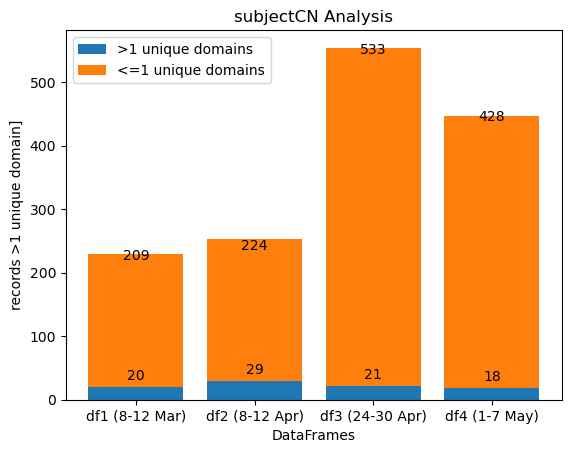

In [20]:
# Define the data
total_records = [len(df1), len(df2), len(df3), len(df4)]
greater_than_one_domain = [len(result_df1), len(result_df2), len(result_df3), len(result_df4)]
# labels = ['df1', 'df2', 'df3', 'df4']
labels = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Plot the stacked bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(labels, greater_than_one_domain, label='>1 unique domains')
bar2 = ax.bar(labels, [total - more_than_one for total, more_than_one in zip(total_records, greater_than_one_domain)],
              bottom=greater_than_one_domain, label='<=1 unique domains')

# Add count labels on top of each bar
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('records >1 unique domain]')
ax.set_title('subjectCN Analysis')

# Add legend
ax.legend()

# Show the plot
plt.show()


### Despite having more records, time period df1 df2 has greater percentage of records with >1 unique domains 

### Checking percentage of malicious records within > 1 unique domains


In [21]:
# print(result_df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print("=========================================================================")
print( "Percentage df1 :", len(result_df1[result_df1['last_analysis_stats.malicious'] > 0]) /   len(result_df1))
print("=========================================================================")
# print(result_df2[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df2:", len(result_df2[result_df2['last_analysis_stats.malicious'] > 0]) /   len(result_df2))
print("=========================================================================")
# print(result_df3[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df3:", len(result_df3[result_df3['last_analysis_stats.malicious'] > 0]) /   len(result_df3))
print("=========================================================================")
# print(result_df4[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df4:", len(result_df4[result_df4['last_analysis_stats.malicious'] > 0]) /   len(result_df4))
print("=========================================================================")

Percentage df1 : 0.35
Percentage df2: 0.6896551724137931
Percentage df3: 0.38095238095238093
Percentage df4: 0.3888888888888889


### Can see that if history has more than one unique domain name, decent chance of being 'malicious'

### Suggestions from team
* Identify large gaps in updated date 
    * potential change in ownership / change in site (scammer took over etc...)

## Check 2: Latest cert

### Does old certs mean its malicious / dangerous? 
* intentional aging to gain trust?

In [22]:
## Dropping rows without certs 
df1_filtered = df1.dropna(subset=['cert_info.latest_cert'])
df2_filtered = df2.dropna(subset=['cert_info.latest_cert'])
df3_filtered = df3.dropna(subset=['cert_info.latest_cert'])
df4_filtered = df4.dropna(subset=['cert_info.latest_cert'])

In [23]:
result_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df1:", len(df1))
# print("certs older than 3 months:", len(result_df1))

result_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df2:", len(df2))
# print("certs older than 3 months:",len(result_df2))

result_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df3:", len(df3))
# print("certs older than 3 months:",len(result_df3))

result_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
# print("total certs df4:", len(df4))
# print("certs older than 3 months:",len(result_df4))

## what are the certs here --> 

new_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]
new_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 12, axis=1)]


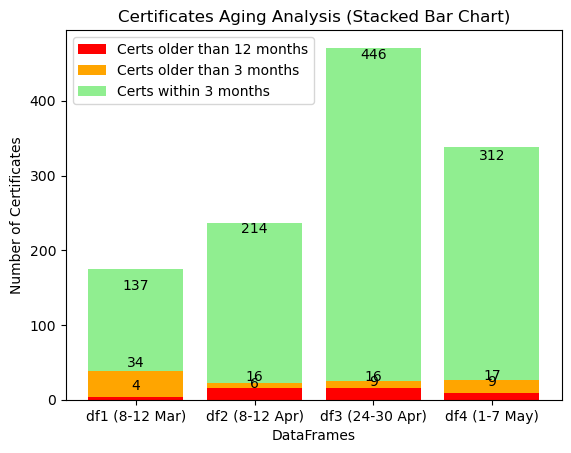

In [24]:
# Define the data
total_certs = [len(df1_filtered), len(df2_filtered), len(df3_filtered), len(df4_filtered)]
certs_older_than_3_months = [len(result_df1) - len(new_df1), len(result_df2) - len(new_df2), len(result_df3) - len(new_df3), len(result_df4) - len(new_df4)]
certs_older_than_12_months = [len(new_df1), len(new_df2), len(new_df3), len(new_df4)]
labels = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Calculate cumulative heights of bar1
cumulative_heights1 = certs_older_than_12_months

# Calculate cumulative heights of bar2
cumulative_heights2 = [older_than_12_months + older_than_3_months for older_than_12_months, older_than_3_months in zip(certs_older_than_12_months, certs_older_than_3_months)]

# Set the colors for the bars
colors = ['red', 'orange', 'lightgreen']

# Plot the stacked bar chart
fig, ax = plt.subplots()
bar3 = ax.bar(labels, certs_older_than_12_months, color=colors[0], label='Certs older than 12 months')
bar1 = ax.bar(labels, certs_older_than_3_months, bottom=cumulative_heights1, color=colors[1], label='Certs older than 3 months')
bar2 = ax.bar(labels, [total - older_than_3_months for total, older_than_3_months in zip(total_certs, certs_older_than_3_months)],
              bottom=cumulative_heights2, color=colors[2], label='Certs within 3 months')

# Function to adjust the y-position of the labels
def adjust_label_position(rect, label):
    height = rect.get_height()
    label_y = max(height, 0) + 3
    label.set_position((label.get_position()[0], label_y))

# Add count labels on top of each bar
for rect1, rect2, rect3 in zip(bar3, bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()

    label1 = ax.annotate(f'{height1}', xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label2 = ax.annotate(f'{height2}', xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label3 = ax.annotate(f'{height3}', xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    # Adjust the y-position of labels
#     adjust_label_position(rect1, label1)
#     adjust_label_position(rect2, label2)
#     adjust_label_position(rect3, label3)

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('Number of Certificates')
ax.set_title('Certificates Aging Analysis (Stacked Bar Chart)')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [25]:
print("Percentage of malicious records within cert > 3 months " )
print("=========================================================================")
# print(result_df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df1:", len(result_df1[result_df1['last_analysis_stats.malicious'] > 0]) /   len(result_df1))
print("=========================================================================")
# print(result_df2[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df2:", len(result_df2[result_df2['last_analysis_stats.malicious'] > 0]) /   len(result_df2))
print("=========================================================================")
# print(result_df3[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df3:", len(result_df3[result_df3['last_analysis_stats.malicious'] > 0]) /   len(result_df3))
print("=========================================================================")
# print(result_df4[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df4:", len(result_df4[result_df4['last_analysis_stats.malicious'] > 0]) /   len(result_df4))
print("=========================================================================")

Percentage of malicious records within cert > 3 months 
Percentage df1: 0.7105263157894737
Percentage df2: 0.45454545454545453
Percentage df3: 0.24
Percentage df4: 0.2692307692307692


In [26]:
print("Percentage of malicious records within cert > 12 months (certs generally expire around 3/12 months)" )
# print(result_df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print("=========================================================================")
print( "Percentage:", len(new_df1[new_df1['last_analysis_stats.malicious'] > 0]) /   len(new_df1))
print("=========================================================================")
# print(result_df2[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage:", len(new_df2[new_df2['last_analysis_stats.malicious'] > 0]) /   len(new_df2))
print("=========================================================================")
# print(result_df3[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage:", len(new_df3[new_df3['last_analysis_stats.malicious'] > 0]) /   len(new_df3))
print("=========================================================================")
# print(result_df4[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage:", len(new_df4[new_df4['last_analysis_stats.malicious'] > 0]) /   len(new_df4))
print("=========================================================================")

Percentage of malicious records within cert > 12 months (certs generally expire around 3/12 months)
Percentage: 0.25
Percentage: 0.375
Percentage: 0.1875
Percentage: 0.3333333333333333


### slightly okay for certificates > 3 months, not really for certificates > 12 months, how about domain age? 

In [27]:
## Dropping rows without certs 
df1_filtered = df1.dropna(subset=['whois_info.creation_date_latest'])
df2_filtered = df2.dropna(subset=['whois_info.creation_date_latest'])
df3_filtered = df3.dropna(subset=['whois_info.creation_date_latest'])
df4_filtered = df4.dropna(subset=['whois_info.creation_date_latest'])

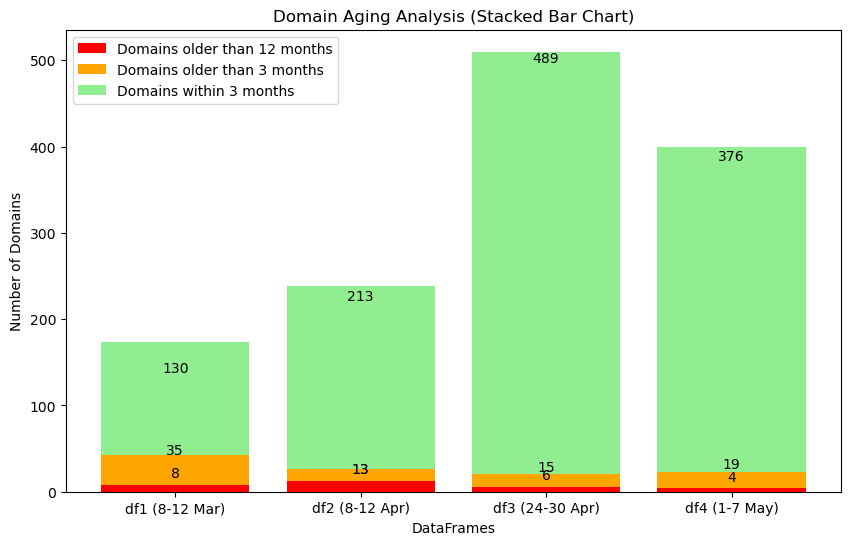

In [28]:
result_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 3, axis=1)]
result_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 3, axis=1)]
result_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 3, axis=1)]
result_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 3, axis=1)]

new_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 12, axis=1)]
new_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 12, axis=1)]
new_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 12, axis=1)]
new_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['whois_info.creation_date_latest']).days // 30 > 12, axis=1)]


# Define the data
total_certs = [len(df1_filtered), len(df2_filtered), len(df3_filtered), len(df4_filtered)]
certs_older_than_3_months = [len(result_df1) - len(new_df1), len(result_df2) - len(new_df2), len(result_df3) - len(new_df3), len(result_df4) - len(new_df4)]
certs_older_than_12_months = [len(new_df1), len(new_df2), len(new_df3), len(new_df4)]
labels = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Calculate cumulative heights of bar1
cumulative_heights1 = certs_older_than_12_months

# Calculate cumulative heights of bar2
cumulative_heights2 = [older_than_12_months + older_than_3_months for older_than_12_months, older_than_3_months in zip(certs_older_than_12_months, certs_older_than_3_months)]

# Set the colors for the bars
colors = ['red', 'orange', 'lightgreen']

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))  
bar3 = ax.bar(labels, certs_older_than_12_months, color=colors[0], label='Domains older than 12 months')
bar1 = ax.bar(labels, certs_older_than_3_months, bottom=cumulative_heights1, color=colors[1], label='Domains older than 3 months')
bar2 = ax.bar(labels, [total - older_than_3_months for total, older_than_3_months in zip(total_certs, certs_older_than_3_months)],
              bottom=cumulative_heights2, color=colors[2], label='Domains within 3 months')

# Function to adjust the y-position of the labels
def adjust_label_position(rect, label):
    height = rect.get_height()
    label_y = max(height, 0) + 3
    label.set_position((label.get_position()[0], label_y))

# Add count labels on top of each bar
for rect1, rect2, rect3 in zip(bar3, bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()

    label1 = ax.annotate(f'{height1}', xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label2 = ax.annotate(f'{height2}', xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    label3 = ax.annotate(f'{height3}', xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                         xytext=(0, 3), textcoords="offset points",
                         ha='center', va='bottom')

    # Adjust the y-position of labels
#     adjust_label_position(rect1, label1)
#     adjust_label_position(rect2, label2)
#     adjust_label_position(rect3, label3)

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('Number of Domains')
ax.set_title('Domain Aging Analysis (Stacked Bar Chart)')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [29]:
print("Percentage of malicious records with domain > 3 months (certs generally expire around 3/12 months)" )
print("=========================================================================")
# print(result_df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df1:", len(result_df1[result_df1['last_analysis_stats.malicious'] > 0]) /   len(result_df1))
print("=========================================================================")
# print(result_df2[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df2:", len(result_df2[result_df2['last_analysis_stats.malicious'] > 0]) /   len(result_df2))
print("=========================================================================")
# print(result_df3[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df3:", len(result_df3[result_df3['last_analysis_stats.malicious'] > 0]) /   len(result_df3))
print("=========================================================================")
# print(result_df4[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage df4:", len(result_df4[result_df4['last_analysis_stats.malicious'] > 0]) /   len(result_df4))
print("=========================================================================")

Percentage of malicious records with domain > 3 months (certs generally expire around 3/12 months)
Percentage df1: 0.6744186046511628
Percentage df2: 0.2692307692307692
Percentage df3: 0.42857142857142855
Percentage df4: 0.30434782608695654


In [30]:
print("Percentage of malicious records with domain > 12 months (certs generally expire around 3/12 months)" )
# print(result_df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print("=========================================================================")
print( "Percentage:", len(new_df1[new_df1['last_analysis_stats.malicious'] > 0]) /   len(new_df1))
print("=========================================================================")
# print(result_df2[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage:", len(new_df2[new_df2['last_analysis_stats.malicious'] > 0]) /   len(new_df2))
print("=========================================================================")
# print(result_df3[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage:", len(new_df3[new_df3['last_analysis_stats.malicious'] > 0]) /   len(new_df3))
print("=========================================================================")
# print(result_df4[['last_analysis_stats.malicious','last_analysis_stats.suspicious']])
print( "Percentage:", len(new_df4[new_df4['last_analysis_stats.malicious'] > 0]) /   len(new_df4))
print("=========================================================================")

Percentage of malicious records with domain > 12 months (certs generally expire around 3/12 months)
Percentage: 0.5
Percentage: 0.15384615384615385
Percentage: 0.5
Percentage: 0.75


### Possible that sites with older domains are malicious

## Check 3: For VT malicious and Suspicious flags, which engine is most "active"?
* VT pulls results (malicious/suspicious/....) from 86-88 engines, we want to see which engines are consistently active

In [31]:
# # df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']].value_counts()
# counts = df1.groupby(['last_analysis_stats.malicious']).size()
# counts

# # df1['last_analysis_stats.malicious'].describe()

In [32]:
# counts = df2.groupby(['last_analysis_stats.malicious']).size()
# counts

# df2['last_analysis_stats.malicious'].describe()

In [33]:
# Create a list of dataframe names
df_names = ['df1', 'df2', 'df3', 'df4']

# Create a new column to store the dataframe names
df1['DataFrame'] = df_names[0]
df2['DataFrame'] = df_names[1]
df3['DataFrame'] = df_names[2]
df4['DataFrame'] = df_names[3]

# Concatenate the dataframes vertically
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Create a new column based on the condition
combined_df['malicious_or_suspicious'] = (combined_df['last_analysis_stats.malicious'] > 0) | (combined_df['last_analysis_stats.suspicious'] > 0)

# # Display the updated DataFrame
# combined_df[['malicious_or_suspicious','last_analysis_stats.malicious','last_analysis_stats.suspicious']]


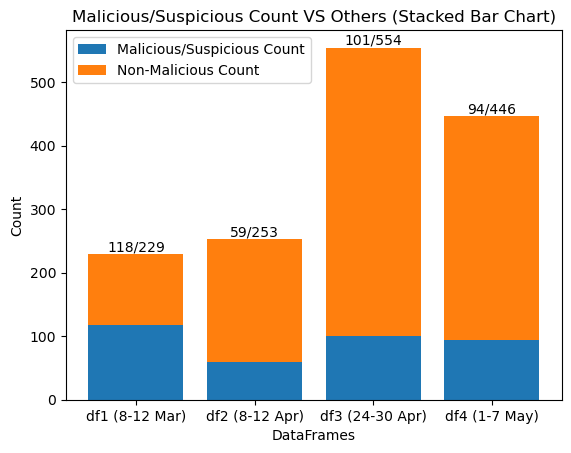

In [34]:
# Create a list of dataframe names
df_names = ['df1 (8-12 Mar)', 'df2 (8-12 Apr)', 'df3 (24-30 Apr)', 'df4 (1-7 May)']

# Create a new column to store the dataframe names
df1['DataFrame'] = df_names[0]
df2['DataFrame'] = df_names[1]
df3['DataFrame'] = df_names[2]
df4['DataFrame'] = df_names[3]

# Concatenate the dataframes vertically
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Create a new column based on the condition
combined_df['malicious_or_suspicious'] = (combined_df['last_analysis_stats.malicious'] > 0) | (combined_df['last_analysis_stats.suspicious'] > 0)

# Group the data by DataFrame and calculate the counts
grouped_df = combined_df.groupby('DataFrame')['malicious_or_suspicious'].sum()

# Get the total counts for each DataFrame
total_counts = combined_df['DataFrame'].value_counts().reindex(df_names, fill_value=0)

# Create a list of DataFrame names
dataframes = grouped_df.index.tolist()

# Create a stacked bar plot
plt.bar(dataframes, grouped_df, label='Malicious/Suspicious Count')
plt.bar(dataframes, total_counts - grouped_df, bottom=grouped_df, label='Non-Malicious Count')

# Add count labels on top of each bar
for i, (count, total_count) in enumerate(zip(grouped_df, total_counts)):
    plt.text(i, total_count, f'{count}/{total_count}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('DataFrames')
plt.ylabel('Count')
plt.title('Malicious/Suspicious Count VS Others (Stacked Bar Chart)')

# Add legend
plt.legend()

# Show the plot
plt.show()


### Infer --> Possible that it takes time for the VT engines to detect them as malicious/suspicious, when is the optimal time to VT call then? (t-2) months?

### Could check 1 month later to see if April's results increased, but the long processing time may not be that useful 
=======================

### Checking 'active' engine

In [35]:
## dwelve into engine level 

## get list of json filenames in df
df_1000_domains = df_1000[['domain']] + ".json"
df_twobatch_domains = df_twobatch[['domain']] + ".json"
combined_list = df_1000_domains['domain'].tolist() + df_twobatch_domains['domain'].tolist()



## auto assign value:0 when key is given
engine_malicious_counts = defaultdict(int)
engine_suspicious_counts = defaultdict(int)
# engine_malicious_counts = {}

path_to_json_files = "downloaded_vtresponse"
# json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.json')]
json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename in combined_list]


for json_file_name in json_file_names:
    with open(os.path.join(path_to_json_files, json_file_name)) as file:
        json_data = json.load(file)
        # Extract the last_analysis_results from the JSON data
        last_analysis_results = json_data['data']['attributes']['last_analysis_results']
#         print("last_analysis_results:", last_analysis_results)

        # Update the malicious count for each engine
        for each in last_analysis_results.values():
#             print("each:", result)
            category = each['category']
            if category == 'malicious':
                engine_name = each['engine_name']
                engine_malicious_counts[engine_name] += 1
            
            elif category == "suspicious":
                engine_name = each['engine_name']
                engine_suspicious_counts[engine_name] += 1
                
# print(engine_malicious_counts)
sorted_dict = sorted(engine_malicious_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

# Find the engine with the maximum malicious count
top_engine = max(engine_malicious_counts, key=engine_malicious_counts.get)
print(f"\n Top engine with the most MALICIOUS count: {top_engine}\n")


# print(engine_malicious_counts)
sorted_dict = sorted(engine_suspicious_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

# Find the engine with the maximum malicious count
top_engine = max(engine_suspicious_counts, key=engine_suspicious_counts.get)
print(f"\n Top engine with the most SUSPICIOUS count: {top_engine}")

[('CyRadar', 282), ('alphaMountain.ai', 243), ('G-Data', 241), ('Sophos', 232), ('Avira', 225), ('BitDefender', 222), ('Fortinet', 213), ('Heimdal Security', 185), ('Lionic', 179), ('Kaspersky', 151), ('Webroot', 135), ('AlphaSOC', 135), ('Seclookup', 126), ('ESET', 122), ('Netcraft', 120), ('Antiy-AVL', 119), ('VIPRE', 119), ('Google Safebrowsing', 114), ('Emsisoft', 109), ('CRDF', 101), ('Cluster25', 99), ('Forcepoint ThreatSeeker', 91), ('Phishtank', 87), ('Viettel Threat Intelligence', 80), ('Segasec', 69), ('Chong Lua Dao', 45), ('Trustwave', 41), ('CMC Threat Intelligence', 33), ('Phishing Database', 13), ('Quick Heal', 12), ('Bfore.Ai PreCrime', 6), ('PhishFort', 3), ('ADMINUSLabs', 3), ('Xcitium Verdict Cloud', 3), ('OpenPhish', 2), ('malwares.com URL checker', 2), ('0xSI_f33d', 2), ('Yandex Safebrowsing', 1), ('ESTsecurity', 1), ('Lumu', 1), ('Certego', 1), ('Scantitan', 1), ('SCUMWARE.org', 1), ('Dr.Web', 1)]

 Top engine with the most MALICIOUS count: CyRadar

[('alphaMounta

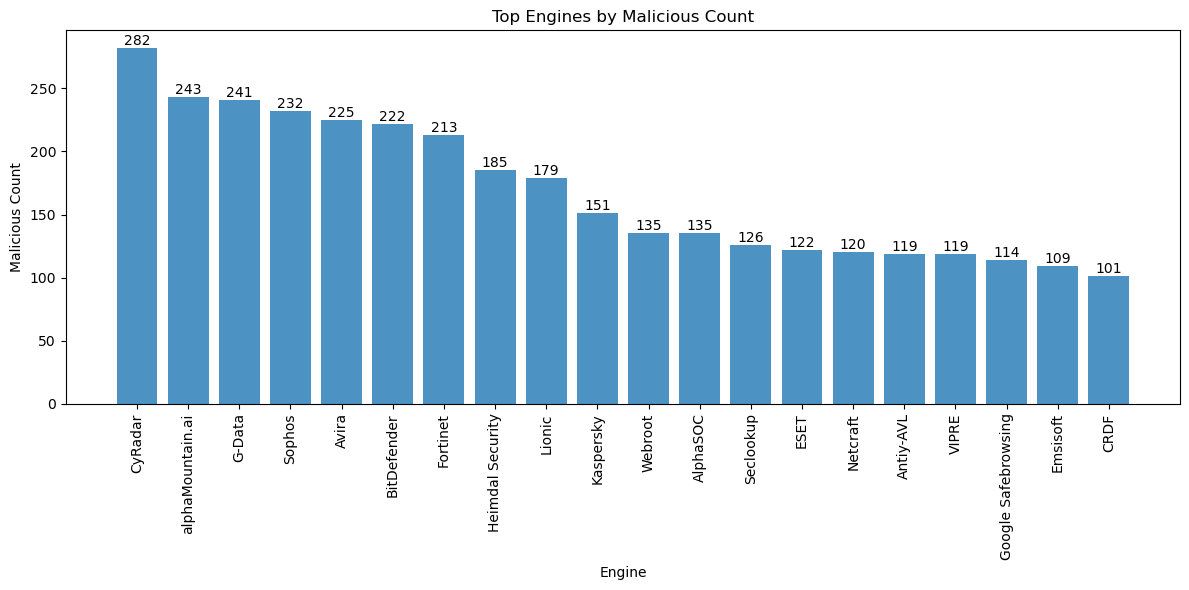

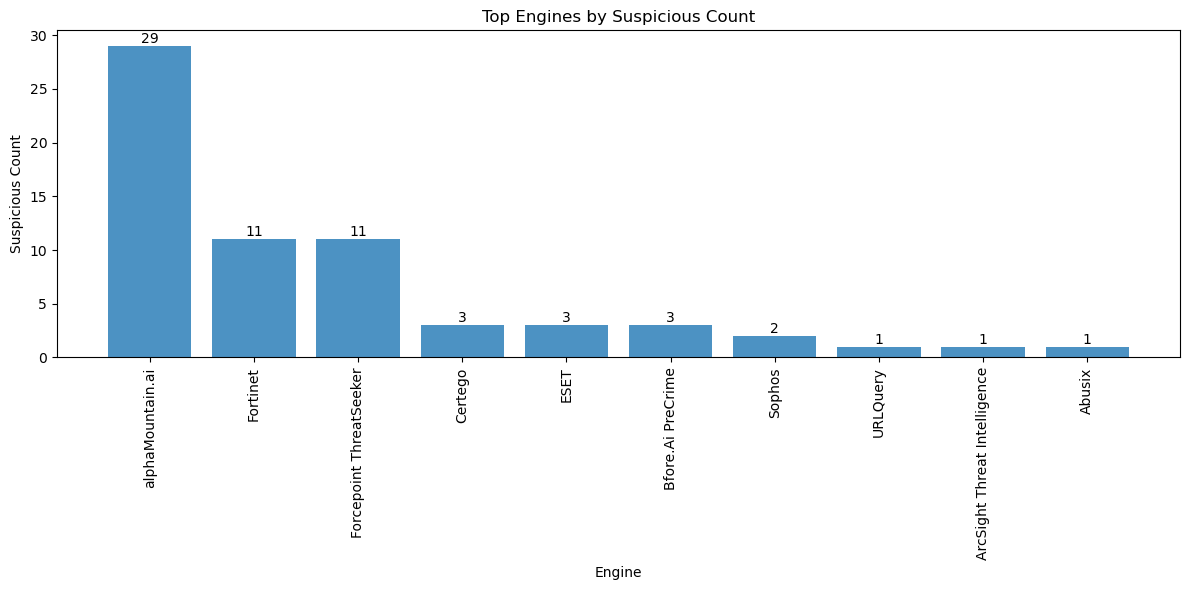

In [36]:
import matplotlib.pyplot as plt

# Get the top 20 engines with the highest malicious counts, or all available records if fewer than 20
top_malicious_engines = sorted(engine_malicious_counts.items(), key=lambda x: x[1], reverse=True)[:20]
malicious_engine_names, malicious_counts = zip(*top_malicious_engines)

# Get the top 20 engines with the highest suspicious counts, or all available records if fewer than 20
top_suspicious_engines = sorted(engine_suspicious_counts.items(), key=lambda x: x[1], reverse=True)[:20]
suspicious_engine_names, suspicious_counts = zip(*top_suspicious_engines)

# Set the x-axis positions for the bars
x_pos_malicious = range(len(malicious_engine_names))
x_pos_suspicious = range(len(suspicious_engine_names))

# Plot the bar graph for top malicious engines
plt.figure(figsize=(12, 6))
plt.bar(x_pos_malicious, malicious_counts, align='center', alpha=0.8)
plt.xticks(x_pos_malicious, malicious_engine_names, rotation=90)
plt.xlabel('Engine')
plt.ylabel('Malicious Count')
plt.title('Top Engines by Malicious Count')

# Add count labels on top of each bar
for i, count in enumerate(malicious_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plot the bar graph for top suspicious engines
plt.figure(figsize=(12, 6))
plt.bar(x_pos_suspicious, suspicious_counts, align='center', alpha=0.8)
plt.xticks(x_pos_suspicious, suspicious_engine_names, rotation=90)
plt.xlabel('Engine')
plt.ylabel('Suspicious Count')
plt.title('Top Engines by Suspicious Count')

# Add count labels on top of each bar
for i, count in enumerate(suspicious_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


###  Top engine with the most MALICIOUS count: CyRadar

###  Top engine with the most SUSPICIOUS count: alphaMountain.ai

### Possible to select afew which are reliable? 

### Xcitium seems not so reliable [Conclusion not Drawn from this dataset] --> We noticed it flagged a non-malicious IP (1.1.1.1/8.8.8.8) as malicious

## Duration check? e.g. Longer =....